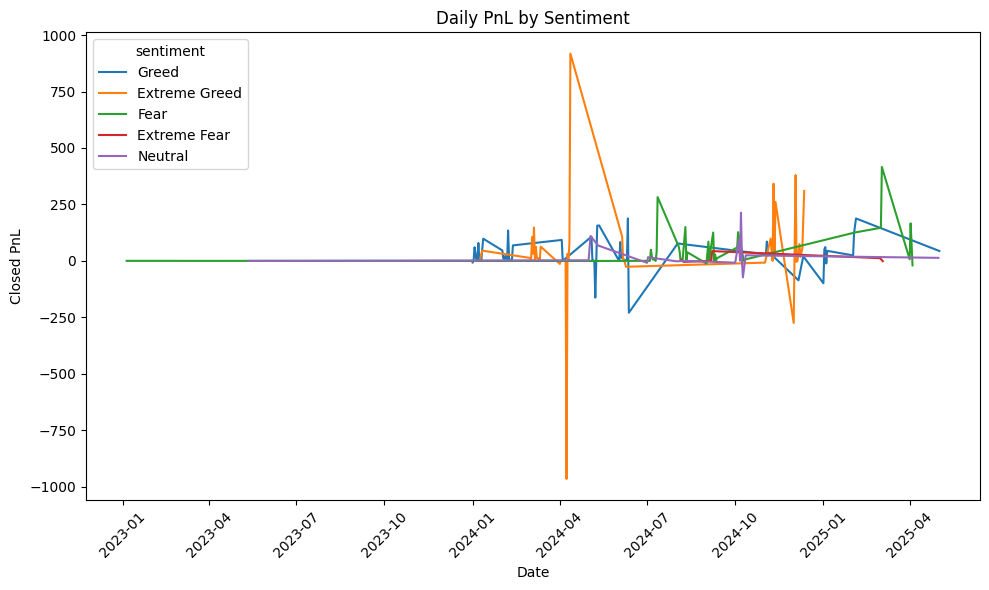

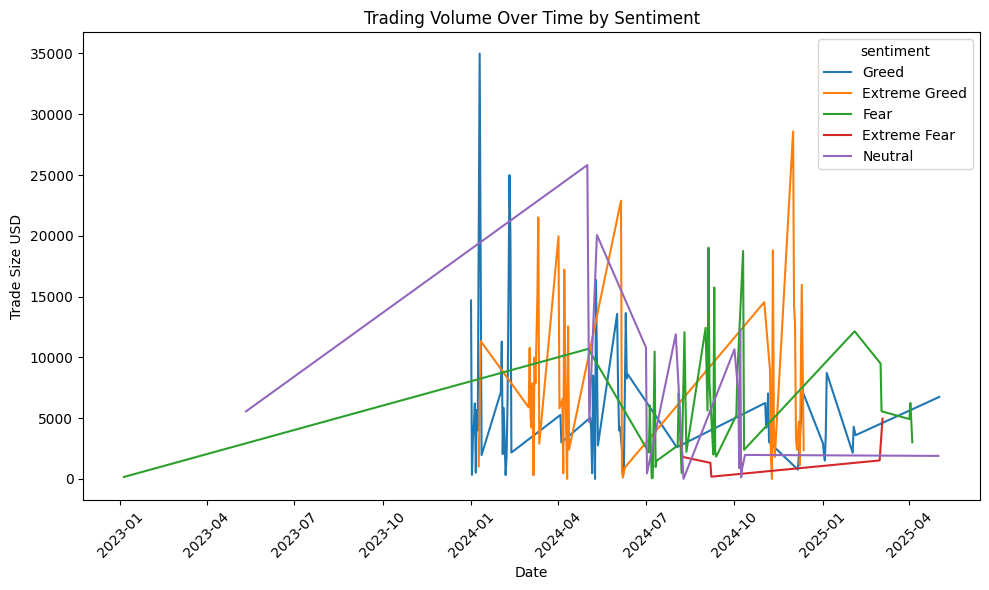

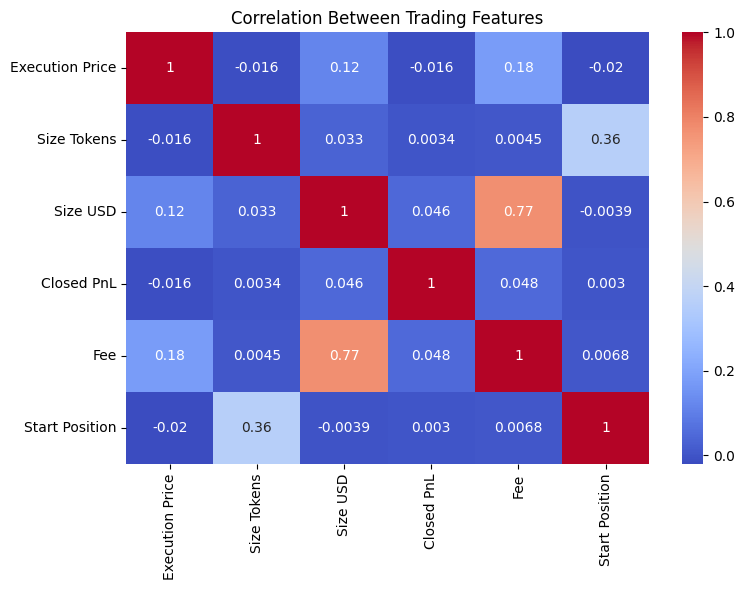

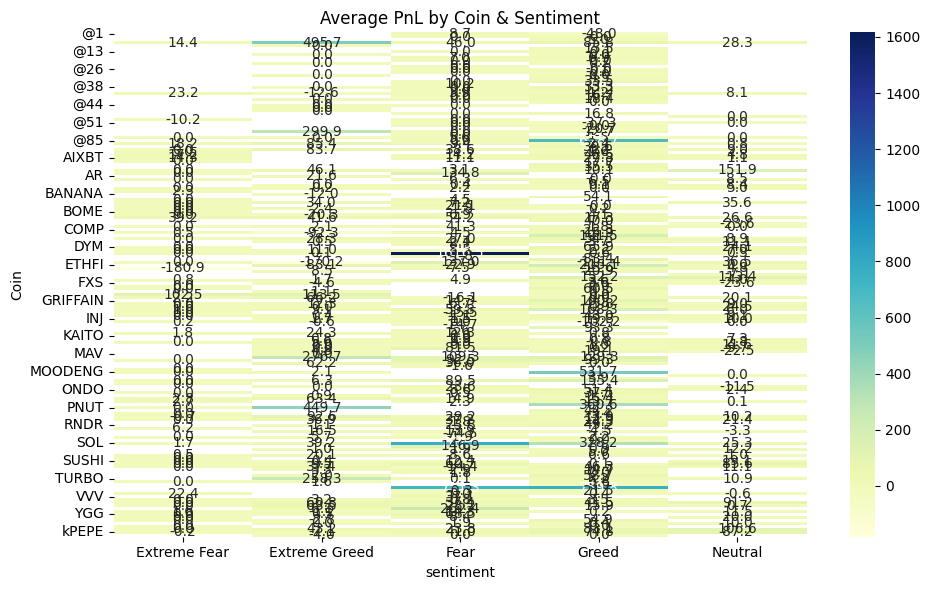

In [ ]:

#  1. Imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


#  2. Load Merged Data

merged_df = pd.read_csv('csv_files/merged_data.csv')
merged_df['date'] = pd.to_datetime(merged_df['date'])


#  3. PnL Over Time by Sentiment

plt.figure(figsize=(10,6))
sns.lineplot(data=merged_df, x='date', y='Closed PnL', hue='sentiment', errorbar=None)
plt.title('Daily PnL by Sentiment')
plt.ylabel('Closed PnL')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('output/pnl_time_series.png')
plt.show()


# 4. Volume Over Time by Sentiment

plt.figure(figsize=(10,6))
sns.lineplot(data=merged_df, x='date', y='Size USD', hue='sentiment', errorbar=None)
plt.title('Trading Volume Over Time by Sentiment')
plt.ylabel('Trade Size USD')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('output/volume_time_series.png')
plt.show()

#  5. Correlation Matrix (Numerical Features)

numeric_cols = ['Execution Price', 'Size Tokens', 'Size USD', 'Closed PnL', 'Fee', 'Start Position']
correlation = merged_df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Trading Features')
plt.tight_layout()
plt.savefig('output/feature_correlation.png')
plt.show()


# 6. Sentiment-Wise Performance Heatmap

# Pivot: average PnL by Coin and Sentiment
pivot = merged_df.pivot_table(values='Closed PnL', index='Coin', columns='sentiment', aggfunc='mean')

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Average PnL by Coin & Sentiment')
plt.tight_layout()
plt.savefig('output/pnl_by_coin_sentiment.png')
plt.show()


#  7. Save Pivot Table

pivot.to_csv('csv_files/pnl_by_coin_sentiment.csv')
